<a href="https://colab.research.google.com/github/yananma/5_programs_per_day/blob/master/0519.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7.1 优化与深度学习

In [2]:
!pip install mxnet d2lzh 

     |████████████████████████████████| 25.4MB 92kB/s 
  Created wheel for d2lzh: filename=d2lzh-0.8.11-cp36-none-any.whl size=10011 sha256=3b388ac6fd2cada6ae80038ccc9dd764fa5a84fa83147c667c91065cc47992ba
  Stored in directory: /root/.cache/pip/wheels/bb/4a/3e/81075d0b470000f4b5769c936f64b22be31c6bcfa81fd050d6
Successfully built d2lzh
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
%matplotlib inline 
import d2lzh as d2l 
from mpl_toolkits import mplot3d 
import numpy as np 

Text(0, 0.5, 'f(x)')

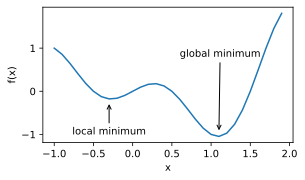

In [4]:
def f(x):
    return x * np.cos(np.pi * x)

d2l.set_figsize((4.5, 2.5))
x = np.arange(-1.0, 2.0, 0.1)
fig, = d2l.plt.plot(x, f(x))
fig.axes.annotate('local minimum', xy=(-0.3, -0.25), xytext=(-0.77, -1.0), arrowprops=dict(arrowstyle='->'))
fig.axes.annotate('global minimum', xy=(1.1, -0.95), xytext=(0.6, 0.8), arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(x)')

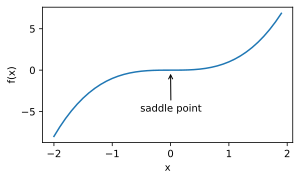

In [5]:
x = np.arange(-2.0, 2.0, 0.1)
fig, = d2l.plt.plot(x, x**3)
fig.axes.annotate('saddle point', xy=(0, -0.2), xytext=(-0.52, -5.0), arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(x)');

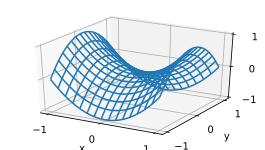

In [6]:
x, y = np.mgrid[-1: 1: 31j, -1: 1: 31j]
z = x**2 - y**2 

ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 2, 'cstride': 2})
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y');

## 7.2 梯度下降和随机梯度下降

In [0]:
%matplotlib inline 
import d2lzh as d2l 
import math 
from mxnet import nd 
import numpy as np 

In [8]:
def gd(eta):
    x = 10 
    results = [x]
    for i in range(10):
        x -= eta * 2 * x  
        results.append(x)
    print('epoch 10, x:', x)
    return results 

res = gd(0.2)

epoch 10, x: 0.06046617599999997


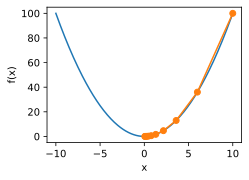

In [9]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n, n, 0.1)
    d2l.set_figsize()
    d2l.plt.plot(f_line, [x * x for x in f_line])
    d2l.plt.plot(res, [x * x for x in res], '-o')
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('f(x)')

show_trace(res)

epoch 10, x: 3.4867844009999995


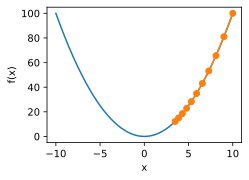

In [10]:
show_trace(gd(0.05))

epoch 10, x: 61.917364224000096


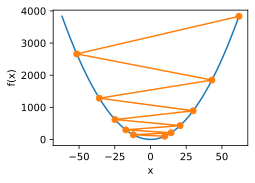

In [11]:
show_trace(gd(1.1))

In [0]:
def train_2d(trainer):
    x1, x2, s1, s2 = -5, -2, 0, 0 
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results 

def show_trace_2d(f, results):
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')


epoch 20, x1 -0.057646, x2 -0.000073


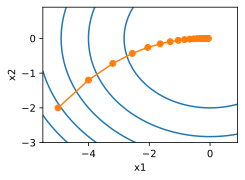

In [13]:
eta = 0.1 

def f_2d(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2 

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2, 0, 0)

show_trace_2d(f_2d, train_2d(gd_2d))

epoch 20, x1 -0.218025, x2 0.056565


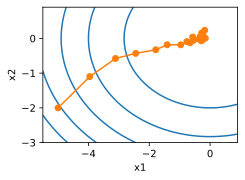

In [14]:
def sgd_2d(x1, x2, s1, s2):
    return (x1 - eta * (2 * x1 + np.random.normal(0.1)), 
        x2 - eta * (4 * x2 + np.random.normal(0.1)), 0, 0)

show_trace_2d(f_2d, train_2d(sgd_2d))

## 7.3 小批量梯度下降

In [0]:
%matplotlib inline 
import d2lzh as d2l 
from mxnet import autograd, gluon, init, nd 
from mxnet.gluon import nn, data as gdata, loss as gloss 
import numpy as np 
import time 

In [16]:
!git clone https://github.com/d2l-ai/d2l-zh.git

Cloning into 'd2l-zh'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15702 (delta 9), reused 8 (delta 4), pack-reused 15685
Receiving objects: 100% (15702/15702), 159.56 MiB | 37.40 MiB/s, done.
Resolving deltas: 100% (11132/11132), done.


In [17]:
!ls d2l-zh/data/

airfoil_self_noise.dat	kaggle_cifar10		    kaggle_house_pred_train.csv
fr-en-small.txt		kaggle_dog		    ptb.zip
jaychou_lyrics.txt.zip	kaggle_house_pred_test.csv


In [18]:
def get_data_ch7():
    data = np.genfromtxt('./d2l-zh/data/airfoil_self_noise.dat', delimiter='\t')
    data = (data - data.mean(axis=0)) / data.std(axis=0)
    return nd.array(data[:1500, :-1]), nd.array(data[:1500, -1])

features, labels = get_data_ch7()
features.shape

(1500, 5)

In [0]:
def sgd(params, states, hyperparams):
    for p in params:
        p[:] -= hyperparams['lr'] * p.grad 

In [0]:
def train_ch7(trainer_fn, states, hyperparams, features, labels, batch_size=10, num_epochs=2):
    net, loss = d2l.linreg, d2l.squared_loss 
    w = nd.random.normal(scale=0.01, shape=(features.shape[1], 1))
    b = nd.zeros(1)
    w.attach_grad()
    b.attach_grad()

    def eval_loss():
        return loss(net(features, w, b), labels).mean().asscalar()

    ls = [eval_loss()]
    data_iter = gdata.DataLoader(gdata.ArrayDataset(features, labels), batch_size, shuffle=True)
    for _ in range(num_epochs):
        start = time.time()
        for batch_i, (X, y) in enumerate(data_iter):
            with autograd.record():
                l = loss(net(X, w, b), y).mean()
            l.backward()
            trainer_fn([w, b], states, hyperparams)
            if (batch_i + 1) * batch_size % 100 == 0:
                ls.append(eval_loss())

    print('loss: %f, %f sec per epoch' % (ls[-1], time.time() - start))
    d2l.set_figsize()
    d2l.plt.plot(np.linspace(0, num_epochs, len(ls)), ls)
    d2l.plt.xlabel('epoch')
    d2l.plt.ylabel('loss')

loss: 0.246095, 0.016890 sec per epoch


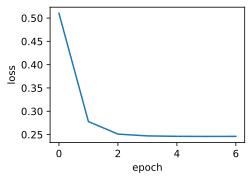

In [21]:
def train_sgd(lr, batch_size, num_epochs=2):
    train_ch7(sgd, None, {'lr': lr}, features, labels, batch_size, num_epochs)

train_sgd(1, 1500, 6)

loss: 0.244370, 1.464674 sec per epoch


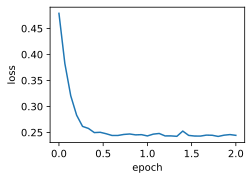

In [22]:
train_sgd(0.005, 1)

loss: 0.244513, 0.133338 sec per epoch


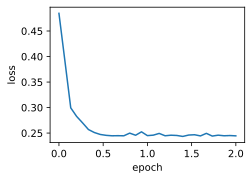

In [23]:
train_sgd(0.05, 10)

In [0]:
def train_gluon_ch7(trainer_name, trainer_hyperparams, features, labels, batch_size=10, num_epochs=2):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=0.01))
    loss = gloss.L2Loss()

    def eval_loss():
        return loss(net(features), labels).mean().asscalar()

    ls = [eval_loss()]
    data_iter = gdata.DataLoader(gdata.ArrayDataset(features, labels), batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), trainer_name, trainer_hyperparams)
    for _ in range(num_epochs):
        start = time.time()
        for batch_i, (X, y) in enumerate(data_iter):
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
            if (batch_i + 1) * batch_size % 100 == 0:
                ls.append(eval_loss())

    print('loss: %f, %f sec per epoch' % (ls[-1], time.time() - start))
    d2l.set_figsize()
    d2l.plt.plot(np.linspace(0, num_epochs, len(ls)), ls)
    d2l.plt.xlabel('epoch')
    d2l.plt.ylabel('loss')

loss: 0.244802, 0.132542 sec per epoch


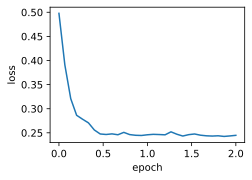

In [25]:
train_gluon_ch7('sgd', {'learning_rate': 0.05}, features, labels, 10)

## 7.4 动量法

epoch 20, x1 -0.943467, x2 -0.000073


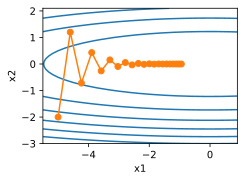

In [26]:
%matplotlib inline 
import d2lzh as d2l 
from mxnet import nd 

eta = 0.4 

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2 

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1 -0.387814, x2 -1673.365109


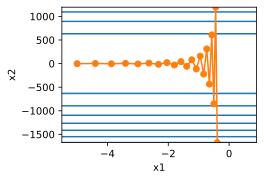

In [27]:
eta = 0.6 
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1 -0.062843, x2 0.001202


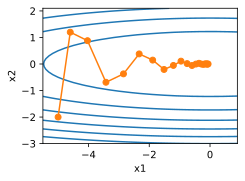

In [28]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1 
    v2 = gamma * v2 + eta * 4 * x2 
    return x1 - v1, x2 - v2, v1, v2 

eta, gamma = 0.4, 0.5 
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

epoch 20, x1 0.007188, x2 0.002553


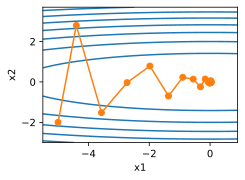

In [29]:
eta = 0.6 
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

In [0]:
!mkdir ../data
!cp d2l-zh/data/airfoil_self_noise.dat ../data/

In [0]:
features, labels = d2l.get_data_ch7()

def init_momentum_states():
    v_w = nd.zeros((features.shape[1], 1))
    v_b = nd.zeros(1)
    return (v_w, v_b)

def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        v[:] = hyperparams['momentum'] * v + hyperparams['lr'] * p.grad 
        p[:] -= v 

loss: 0.246023, 0.203941 sec per epoch


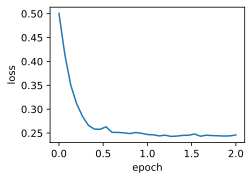

In [32]:
d2l.train_ch7(sgd_momentum, init_momentum_states(), {'lr':0.02, 'momentum':0.5}, features, labels)

loss: 0.253452, 0.184558 sec per epoch


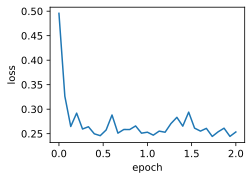

In [33]:
d2l.train_ch7(sgd_momentum, init_momentum_states(), {'lr':0.02, 'momentum':0.9}, features, labels)

loss: 0.243960, 0.215766 sec per epoch


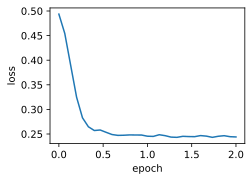

In [34]:
d2l.train_ch7(sgd_momentum, init_momentum_states(), {'lr':0.004, 'momentum':0.9}, features, labels)

loss: 0.244027, 0.167657 sec per epoch


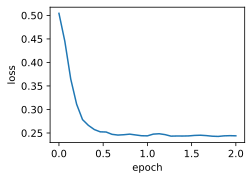

In [35]:
d2l.train_gluon_ch7('sgd', {'learning_rate': 0.004, 'momentum': 0.9}, features, labels)

## 7.5 AdaGrad 算法

epoch 20, x1 -2.382563, x2 -0.158591


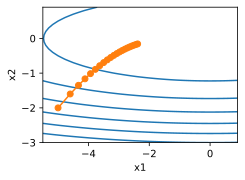

In [36]:
%matplotlib inline 
import d2lzh as d2l 
import math 
from mxnet import nd 

def adagrad_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 += g1 ** 2 
    s2 += g2 ** 2 
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2 

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4 
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1 -0.002295, x2 -0.000000


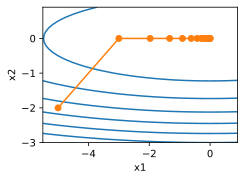

In [37]:
eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

In [0]:
features, labels = d2l.get_data_ch7()

def init_adagrad_states():
    s_w = nd.zeros((features.shape[1], 1))
    s_b = nd.zeros(1)
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6 
    for p, s in zip(params, states):
        s[:] += p.grad.square()
        p[:] -= hyperparams['lr'] * p.grad / (s + eps).sqrt()

loss: 0.242588, 0.240468 sec per epoch


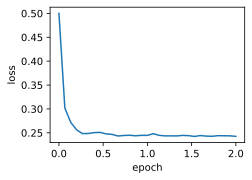

In [39]:
d2l.train_ch7(adagrad, init_adagrad_states(), {'lr': 0.1}, features, labels)

loss: 0.242942, 0.234397 sec per epoch


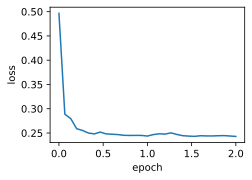

In [40]:
d2l.train_gluon_ch7('adagrad', {'learning_rate': 0.1}, features, labels)

## 7.6 RMSProp 算法

epoch 20, x1 -0.010599, x2 0.000000


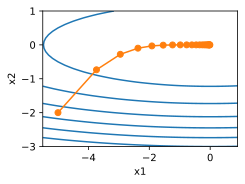

In [42]:
%matplotlib inline
import d2lzh as d2l 
import math 
from mxnet import nd 

def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2 
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2 
    x1 -= eta / math.sqrt(s1 + eps) * g1 
    x2 -= eta / math.sqrt(s2 + eps) * g2 
    return x1, x2, s1, s2 

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2 

eta, gamma = 0.4, 0.9 
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

In [0]:
features, labels = d2l.get_data_ch7()

def init_rmsprop_states():
    s_w = nd.zeros((features.shape[1], 1))
    s_b = nd.zeros(1)
    return (s_w, s_b)

def rmsprop(params, states, hyperparams):
    gamma, eps = hyperparams['gamma'], 1e-6 
    for p, s in zip(params, states):
        s[:] = gamma * s + (1 - gamma) * p.grad.square()
        p[:] -= hyperparams['lr'] * p.grad / (s + eps).sqrt()

loss: 0.246135, 0.254269 sec per epoch


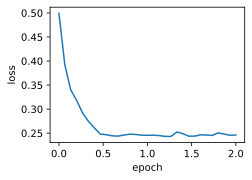

In [44]:
d2l.train_ch7(rmsprop, init_rmsprop_states(), {'lr': 0.01, 'gamma': 0.9}, features, labels)

loss: 0.245615, 0.181391 sec per epoch


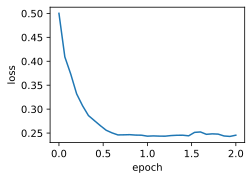

In [45]:
d2l.train_gluon_ch7('rmsprop', {'learning_rate': 0.01, 'gamma1': 0.9}, features, labels)

## 7.7 AdaDelta 算法

In [0]:
%matplotlib inline 
import d2lzh as d2l 
from mxnet import nd 

features, labels = d2l.get_data_ch7()

def init_adadelta_states():
    s_w, s_b = nd.zeros((features.shape[1], 1)), nd.zeros(1)
    delta_w, delta_b = nd.zeros((features.shape[1], 1)), nd.zeros(1)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5 
    for p, (s, delta) in zip(params, states):
        s[:] = rho * s + (1 - rho) * p.grad.square()
        g = ((delta + eps).sqrt() / (s + eps).sqrt()) * p.grad 
        p[:] -= g 
        delta[:] = rho * delta + (1 - rho) * g * g 

loss: 0.243357, 0.253646 sec per epoch


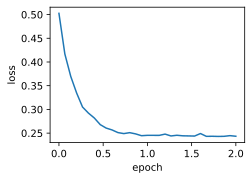

In [47]:
d2l.train_ch7(adadelta, init_adadelta_states(), {'rho': 0.9}, features, labels)

loss: 0.246860, 0.286474 sec per epoch


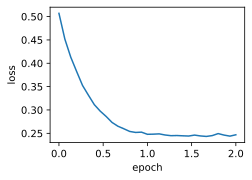

In [48]:
d2l.train_gluon_ch7('adadelta', {'rho': 0.9}, features, labels)

## 7.8 Adam 算法

In [0]:
%matplotlib inline 
import d2lzh as d2l 
from mxnet import nd 

features, labels = d2l.get_data_ch7()

def init_adam_states():
    v_w, v_b = nd.zeros((features.shape[1], 1)), nd.zeros(1)
    s_w, s_b = nd.zeros((features.shape[1], 1)), nd.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6 
    for p, (v, s) in zip(params, states):
        v[:] = beta1 * v + (1 - beta1) * p.grad 
        s[:] = beta2 * s + (1 - beta2) * p.grad.square()
        v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
        s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
        p[:] -= hyperparams['lr'] * v_bias_corr / (s_bias_corr.sqrt() + eps)
    hyperparams['t'] += 1 

loss: 0.245369, 0.325748 sec per epoch


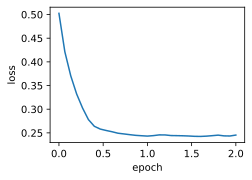

In [54]:
d2l.train_ch7(adam, init_adam_states(), {'lr': 0.01, 't': 1}, features, labels)

loss: 0.242758, 0.140634 sec per epoch


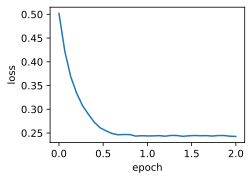

In [55]:
d2l.train_gluon_ch7('adam', {'learning_rate': 0.01}, features, labels)